In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv 
from sklearn.model_selection import train_test_split
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.spatial import distance


Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050
Audio Sampling Frequency 22050


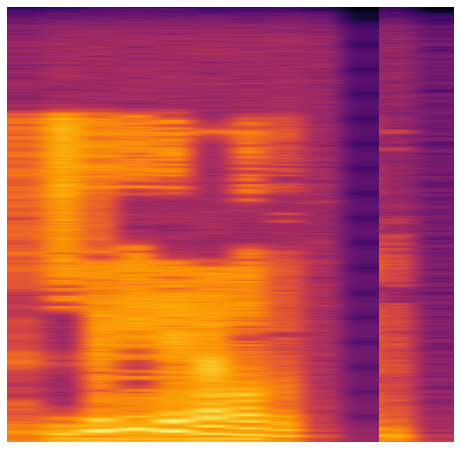

In [5]:
FRAME_SIZE = 1024
HOP_LENGTH = 512
to_append =[[],[],[],[]]
spec_cent=[]
def Spectogram():
        header = 'filename spectral_centroid spectral_rolloff mfcc chroma_stft  '.split()
        file = open('dataset.csv', 'w', newline='')
        with file:
          writer = csv.writer(file)
          writer.writerow(header)
        cmap = plt.get_cmap('inferno')
        plt.figure(figsize=(8,8))
        DataBase = 'Ahmed.wav Amira.wav Dalia.wav Hassan.wav Maram.wav Maryem.wav Mayar.wav Mostafa.wav Radwa.wav Raouf.wav Salah.wav Sara.wav Shady.wav Yasmin.wav Tarek.wav Zeyad.wav '.split()
        for base in DataBase:
            y, sr = librosa.load("./drive/MyDrive/GP/Semi_App/DataBase/"+base, mono=True, duration=5)
            print("Audio Sampling Frequency",sr)
            plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
            plt.axis('off')
            plt.savefig(f'./drive/MyDrive/GP/Semi_App/img_data/{base[:-3].replace(".", "")}.png') 
             # plt.clf()           
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_cent=spec_cent
            zero = librosa.feature.zero_crossing_rate(y=y,frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)
            lpc = librosa.lpc(y,16)
            to_append = f'{DataBase.index(base)} {np.mean(spec_cent)} {np.mean(rolloff)} {np.mean(mfcc)} {np.mean(chroma_stft)}'    
            file = open('dataset.csv', 'a', newline='')
            to_append=to_append
            with file:
               writer = csv.writer(file)
               writer.writerow(to_append.split())
Spectogram()

In [6]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print(len(model.weights))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

8


In [ ]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=16,
                    batch_size=1)

Epoch 1/16
 1/12 [=>............................] - ETA: 0s - loss: 2.1971 - accuracy: 0.0000e+00

InvalidArgumentError: ignored